In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



In [2]:
df = pd.read_csv("news.csv")

In [9]:
df["text_len"] = df["text"].apply(lambda x : len(x))

In [14]:
df["title_len"] = df["title"].apply(lambda x : len(x))

In [15]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label', 'text_len', 'title_len'], dtype='object')

In [25]:
#z_scored_text_len = df["text_len"].apply(lambda x : ( x-np.mean(df.text_len) ) / np.std(df.text_len))
#z_scored_title_len = df["title_len"].apply(lambda x : ( x-np.mean(df.title_len) ) / np.std(df.title_len))

In [79]:
df.count()

Unnamed: 0    6335
title         6335
text          6335
label         6335
text_len      6335
title_len     6335
dtype: int64

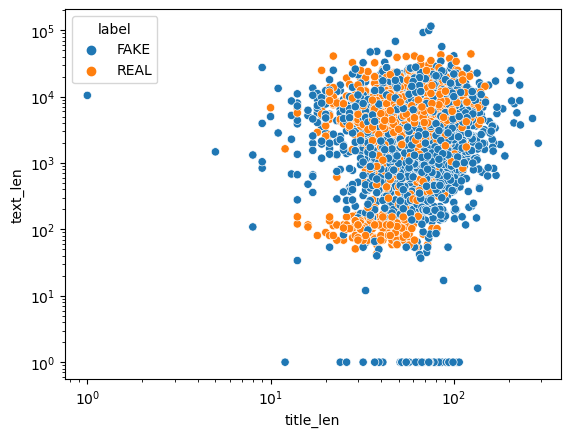

In [42]:
sns.scatterplot(data=df, x="title_len", y="text_len",hue="label")
plt.xscale('log')
plt.yscale('log')
plt.show()

In [81]:
#train test split

X=df.iloc[: , 2]
y=df.iloc[: , -3]

X_train ,X_test , y_train , y_test = train_test_split(X , y,test_size=0.2 , random_state=7)

In [82]:

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test= vectorizer.transform(X_test)



In [83]:
print(tfidf_train.shape)
print(tfidf_test.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(5068, 61651)
(1267, 61651)
(5068,)
(1267,)
(1267,)
(5068,)


In [84]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'هذا', 'والمرضى', 'ยงade'], dtype=object)

In [85]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train , y_train)
 

y_pred=pac.predict(tfidf_test)

score=accuracy_score(y_test,y_pred)

print(score*100)

92.89660615627466


In [87]:
conf_matrix = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

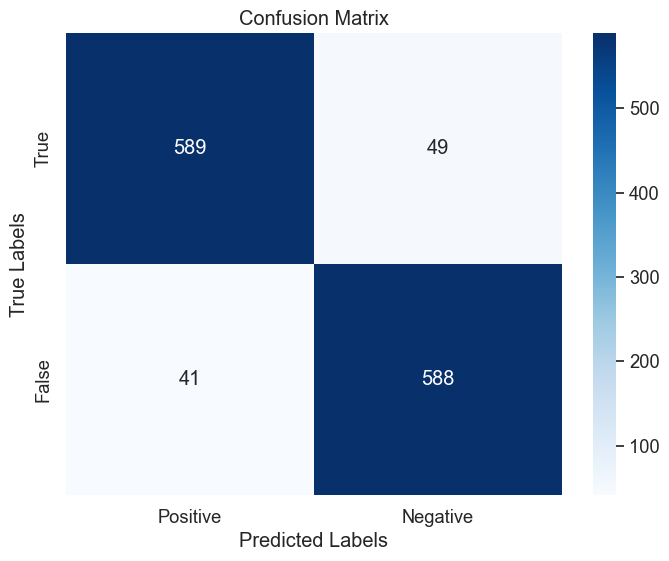

In [94]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Positive","Negative"], yticklabels=["True","False"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



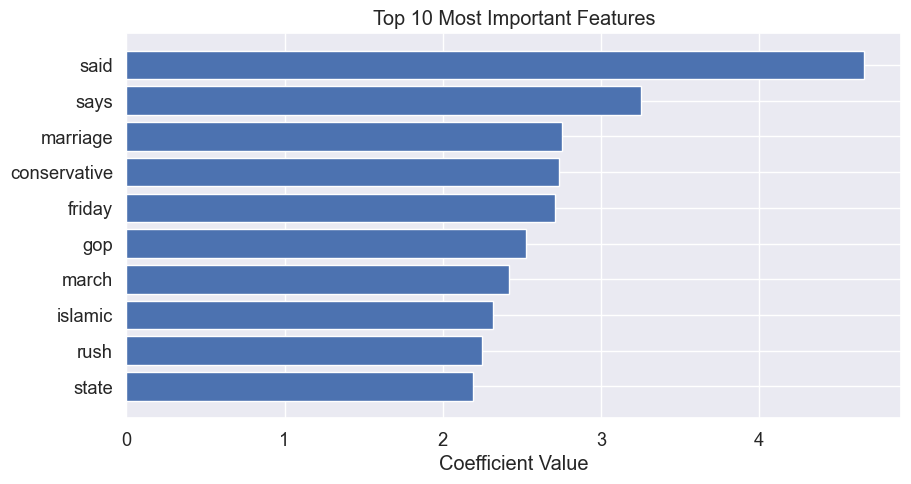

In [97]:
coefficients = pac.coef_[0]
feature_names = vectorizer.get_feature_names_out()

top_n = 10  # Number of top features to visualize
top_coefficients = np.argsort(coefficients)[-top_n:]

plt.figure(figsize=(10, 5))
plt.barh(range(top_n), coefficients[top_coefficients], align='center')
plt.yticks(range(top_n), [feature_names[i] for i in top_coefficients])
plt.xlabel('Coefficient Value')
plt.title('Top {} Most Important Features'.format(top_n))
plt.show()